In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Dùng thư viện yfinance để tải dataset 
import pandas as pd

data =pd.read_csv('ARE_Data.csv', index_col='Date')
data

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
04/13/2023,119.54,121.31,121.64,118.56,1.23M,-1.63%
04/12/2023,121.52,124.82,124.84,121.40,1.00M,-1.24%
04/11/2023,123.04,124.03,124.96,122.89,1.42M,-0.79%
04/10/2023,124.02,123.55,124.51,121.98,771.66K,-0.30%
04/06/2023,124.39,124.32,124.74,122.64,604.22K,0.59%
...,...,...,...,...,...,...
12/07/2017,128.17,126.94,128.30,126.39,834.96K,1.04%
12/06/2017,126.85,126.40,127.04,125.68,635.90K,0.66%
12/05/2017,126.02,129.00,129.21,125.70,1.28M,-2.33%


In [8]:
# Xem data 
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,28.950001,29.082500,28.690001,29.037500,27.133329,115127600
2017-01-04,28.962500,29.127501,28.937500,29.004999,27.102959,84472400
2017-01-05,28.980000,29.215000,28.952499,29.152500,27.240780,88774400
2017-01-06,29.195000,29.540001,29.117500,29.477501,27.544474,127007600
2017-01-09,29.487499,29.857500,29.485001,29.747499,27.796770,134247600
...,...,...,...,...,...,...
2023-04-28,168.490005,169.850006,167.880005,169.679993,169.679993,55209200
2023-05-01,169.279999,170.449997,168.639999,169.589996,169.589996,52472900
2023-05-02,170.089996,170.350006,167.539993,168.539993,168.539993,48425700


In [9]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression


In [10]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test validate theo tỉ lệ 7:1:2
df = pd.read_csv('/content/drive/MyDrive/StockData/AAPL_stock_data.csv')
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [11]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 14.5 MB/s eta 0:00:00


In [12]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4114.918, Time=4.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4147.851, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4132.583, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4133.547, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4149.430, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4135.598, Time=0.79 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4136.437, Time=0.69 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=4139.391, Time=0.92 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=4122.144, Time=3.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4133.640, Time=0.71 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=4137.290, Time=0.90 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=4137.371, Time=1.29 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=3.93 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=4116.717, Time=2.04 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0] i

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True)

In [14]:
# 4. Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(n_periods=len(y_val))

In [15]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[127.52133171 127.31102712 127.65632972 127.55979325 127.73830802
 127.84051199 127.81309417 128.10305071 127.92892119 128.3069793
 128.11353618 128.4405025  128.36150882 128.52542023 128.63752674
 128.60607188 128.89376848 128.72784922 129.09282044 128.91567996
 129.22516552 129.16267076 129.31308077 129.43406578 129.39939508
 129.684312   129.52676075 129.87886474 129.71746095 130.01030466]


In [16]:
# 7. Đánh giá độ chính xác validate, test
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)


Validation RMSE: 16.752576629266006
Testing RMSE: 19.0588480724337


Validation RMSE: 16.752576629266006
Testing RMSE: 19.0588480724337


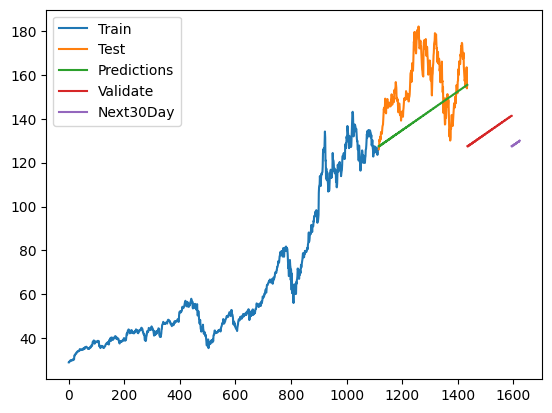

In [17]:
# 8. Tính RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# 9.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [ ]:
test_data.index

RangeIndex(start=1116, stop=1435, step=1)